### Import modules

In [6]:
cd

/home/jovyan


In [7]:
import datacube 
from datacube.virtual import catalog_from_file
dc = datacube.Datacube()
from datacube.helpers import write_geotiff
import numpy as np
import sys


sys.path.append("Scripts")
from dea_plotting import rgb
from dea_bandindices import calculate_indices
from dea_plotting import display_map

import rasterio
import matplotlib
import xarray as xr

### Locations

Use LCCS areas

In [8]:
# # Adelaide:
# min_x= 550000
# max_x= 650000
# min_y= -3850000
# max_y= -3750000

# area_name: "LakeGairdner"
# min_x = 350000
# max_x = 400000
# min_y = -3500000
# max_y = -3450000

# area_name = "Lake_Eyre"
# min_x= 500000
# max_x= 600000
# min_y= -3000000
# max_y= -2900000

# # Diamantina:
# min_x= 800000
# max_x= 900000
# min_y= -2800000
# max_y= -2700000

# area_name = 'Gwydir'
# min_x= 1600000
# max_x= 1700000
# min_y= -3400000
# max_y= -3300000

# area_name = 'Leichhardt'
# min_x= 800000
# max_x= 900000
# min_y= -2000000
# max_y= -1900000

area_name = 'Kakadu'
min_x= 0
max_x= 100000
min_y= -1350000
max_y= -1250000

x = (min_x,max_x)
y = (min_y,max_y)
crs = "EPSG:3577"


Or use your own area defined by coordinates

In [9]:
area_name = 'Kakadu'

# Set the central latitude and longitude
central_lat = -12.26723
central_lon =132.254278

# Set the buffer to load around the central coordinates
buffer = 0.2

# Compute the bounding box for the study area
study_area_lat = (central_lat - buffer, central_lat + buffer)
study_area_lon = (central_lon - buffer, central_lon + buffer)

x = study_area_lon
y = study_area_lat
crs = "EPSG:4326"

display_map(x=study_area_lon, y=study_area_lat, margin=-0.2)

### Set parameters

In [103]:
res = (-100, 100)
time = ("2015-01-01", "2015-02-28")
measurements = ['nbart_blue','nbart_green','nbart_red','nbart_nir','nbart_swir_1','nbart_swir_2'] #["blue", "green", "red", "nir", "swir1", "swir2"]

query =({'time': time,
             'x':x,
            'y':y,
            'crs':crs,
            'output_crs':'EPSG:3577',
            'resolution':res,
#             'measurements':measurements
        })

product = ['ga_ls8c_ard_3']

### Load data

In [104]:
data = dc.load(product=product, **query)
data

<xarray.Dataset>
Dimensions:                     (time: 6, x: 445, y: 436)
Coordinates:
  * time                        (time) datetime64[ns] 2015-01-12T01:16:39.814277 ... 2015-02-13T01:16:49.978929
  * y                           (y) float64 -1.272e+06 -1.272e+06 ... -1.315e+06
  * x                           (x) float64 6.05e+03 6.15e+03 ... 5.045e+04
    spatial_ref                 int32 3577
Data variables:
    nbar_coastal_aerosol        (time, y, x) int16 1393 1373 1373 ... 421 521
    nbar_blue                   (time, y, x) int16 1575 1563 1558 ... 431 518
    nbar_green                  (time, y, x) int16 1848 1839 1839 ... 662 804
    nbar_red                    (time, y, x) int16 1414 1401 1397 ... 583 666
    nbar_nir                    (time, y, x) int16 616 594 590 ... 2024 2231
    nbar_swir_1                 (time, y, x) int16 383 379 376 ... 2123 848 998
    nbar_swir_2                 (time, y, x) int16 321 314 312 ... 1555 450 575
    nbar_panchromatic           (time, y, x) int16 1593 1600 1594 ... 1263 627
    nbart_coastal_aerosol       (time, y, x) int16 1393 1373 1373 ... 415 525
    nbart_blue                  (time, y, x) int16 1575 1563 1558 ... 424 522
    nbart_green                 (time, y, x) int16 1848 1839 1839 ... 652 810
    nbart_red                   (time, y, x) int16 1414 1401 1397 ... 574 672
    nbart_nir                   (time, y, x) int16 616 594 590 ... 1999 2246
    nbart_swir_1                (time, y, x) int16 383 379 376 ... 2140 835 1006
    nbart_swir_2                (time, y, x) int16 321 314 312 ... 1568 443 580
    nbart_panchromatic          (time, y, x) int16 1593 1600 1594 ... 1270 633
    oa_fmask                    (time, y, x) uint8 2 2 2 2 2 2 2 ... 1 1 1 1 1 1
    oa_nbar_contiguity          (time, y, x) uint8 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
    oa_nbart_contiguity         (time, y, x) uint8 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
    oa_azimuthal_exiting        (time, y, x) float32 98.3848 ... 165.36401
    oa_azimuthal_incident       (time, y, x) float32 112.299774 ... -23.200394
    oa_combined_terrain_shadow  (time, y, x) uint8 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
    oa_exiting_angle            (time, y, x) float32 0.8372615 ... 2.4761486
    oa_incident_angle           (time, y, x) float32 30.916822 ... 31.89416
    oa_relative_azimuth         (time, y, x) float32 -13.91497 ... 182.83347
    oa_relative_slope           (time, y, x) float32 13.91497 ... 171.4356
    oa_satellite_azimuth        (time, y, x) float32 98.3848 ... 278.3953
    oa_satellite_view           (time, y, x) float32 0.8372615 ... 3.2843869
    oa_solar_azimuth            (time, y, x) float32 112.299774 ... 95.56183
    oa_solar_zenith             (time, y, x) float32 30.916822 ... 31.063765
    oa_time_delta               (time, y, x) float32 8.462372 ... -10.001025
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

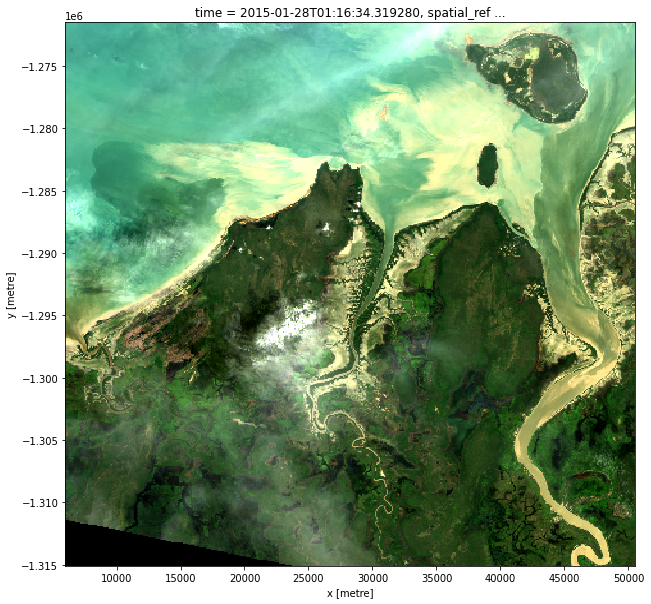

In [58]:
rgb(data.isel(time=2),bands=['nbart_red','nbart_green','nbart_blue'], size=10)

In [23]:
# Let's get a single image for a test date
im = data.isel(time=2)

### Calculate TCW

In [78]:
#Do tassled Cap transformation
tcw = calculate_indices(ds=data, index='TCW', collection='ga_ls_3',normalise=False)
tcg = calculate_indices(ds=data, index='TCG', collection='ga_ls_3',normalise=False)

tcw

<xarray.Dataset>
Dimensions:       (time: 6, x: 445, y: 436)
Coordinates:
  * time          (time) datetime64[ns] 2015-01-12T01:16:39.814277 ... 2015-02-13T01:16:49.978929
  * y             (y) float64 -1.272e+06 -1.272e+06 ... -1.315e+06 -1.315e+06
  * x             (x) float64 6.05e+03 6.15e+03 6.25e+03 ... 5.035e+04 5.045e+04
    spatial_ref   int32 3577
Data variables:
    nbart_blue    (time, y, x) int16 1575 1563 1558 1560 ... 442 1254 424 522
    nbart_green   (time, y, x) int16 1848 1839 1839 1840 ... 750 1660 652 810
    nbart_red     (time, y, x) int16 1414 1401 1397 1402 ... 534 1460 574 672
    nbart_nir     (time, y, x) int16 616 594 590 606 609 ... 2480 3530 1999 2246
    nbart_swir_1  (time, y, x) int16 383 379 376 373 384 ... 1094 2140 835 1006
    nbart_swir_2  (time, y, x) int16 321 314 312 312 321 ... 572 1568 443 580
    TCW           (time, y, x) float64 503.1 500.4 501.6 ... -197.1 -292.4
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

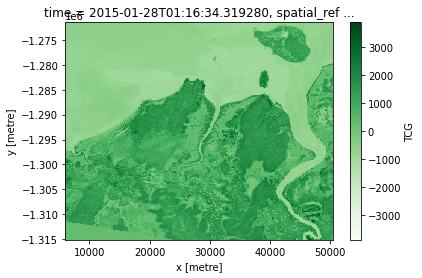

In [81]:
(tcg.TCG.isel(time=2)).plot.imshow(cmap='Greens')

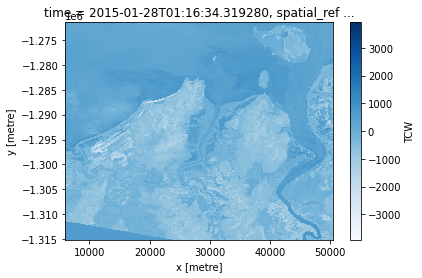

In [82]:
(tcw.TCW.isel(time=2)).plot.imshow(cmap='Blues')

In [96]:
all_wet = tcw.TCW > -600
not_open = tcw.TCW < 0
wet = all_wet.where(not_open)
wet.to_dataset(name='TCW')

# # import matplotlib.pyplot as plt
# plt.imshow(not_open.isel(time=2))
# plt.colorbar()

<xarray.Dataset>
Dimensions:      (time: 6, x: 445, y: 436)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-12T01:16:39.814277 ... 2015-02-13T01:16:49.978929
  * y            (y) float64 -1.272e+06 -1.272e+06 ... -1.315e+06 -1.315e+06
  * x            (x) float64 6.05e+03 6.15e+03 6.25e+03 ... 5.035e+04 5.045e+04
    spatial_ref  int32 3577
Data variables:
    TCW          (time, y, x) float64 nan nan nan nan nan ... 1.0 0.0 1.0 1.0

In [92]:
wet

(array([0, 0, 0, ..., 5, 5, 5]),
 array([  0,   0,   0, ..., 435, 435, 435]),
 array([396, 404, 406, ..., 441, 443, 444]))

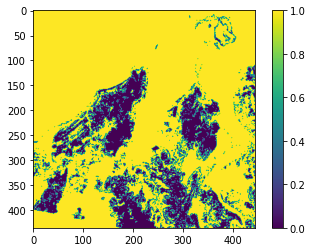

In [90]:
plt.imshow(all_wet.isel(time=2))
plt.colorbar()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0]])

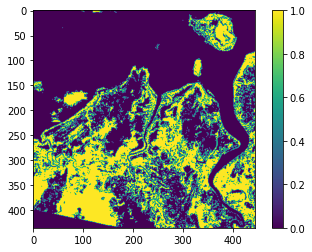

In [70]:
wet = np.where(all_wet & not_open, 1, 0)
plt.imshow(wet)
plt.colorbar()
wet

In [76]:
wet_arr = xr.DataArray(wet,coords=tcw.TCW.coords, dims=tcw.TCW.dims).to_dataset(name='TCW')
wet_arr

<xarray.Dataset>
Dimensions:      (x: 445, y: 436)
Coordinates:
    time         datetime64[ns] 2015-01-28T01:16:34.319280
  * y            (y) float64 -1.272e+06 -1.272e+06 ... -1.315e+06 -1.315e+06
  * x            (x) float64 6.05e+03 6.15e+03 6.25e+03 ... 5.035e+04 5.045e+04
    spatial_ref  int32 3577
Data variables:
    TCW          (y, x) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 1 1 1 1 1 1 0 0

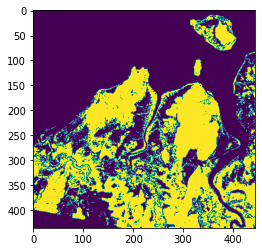

In [63]:
green = tcg.TCG > 1000
plt.imshow(green)

In [64]:
wet = (tcw.TCW > -600).to_dataset()
wet

<xarray.Dataset>
Dimensions:      (x: 445, y: 436)
Coordinates:
    time         datetime64[ns] 2015-01-28T01:16:34.319280
  * y            (y) float64 -1.272e+06 -1.272e+06 ... -1.315e+06 -1.315e+06
  * x            (x) float64 6.05e+03 6.15e+03 6.25e+03 ... 5.035e+04 5.045e+04
    spatial_ref  int32 3577
Data variables:
    TCW          (y, x) bool True True True True True ... True True False False

In [44]:
# Export
dataset = tcw.TCW.squeeze().to_dataset(name='tcw')
write_geotiff('tcw.tif', dataset)

/env/lib/python3.6/site-packages/datacube/helpers.py:34: DeprecationWarning: Function datacube.helpers.write_geotiff is deprecated,
please use datacube.utils.cog.write_cog instead
  category=DeprecationWarning)


In [63]:
tcw.TCW.squeeze()

<xarray.DataArray 'TCW' (y: 492, x: 432)>
array([[-0.32173762, -0.30538943, -0.33300037, ..., -0.27737214,
        -0.32666694, -0.33751278],
       [-0.28192318, -0.20486156, -0.33144041, ..., -0.28006313,
        -0.26974999, -0.27632865],
       [-0.30809454, -0.30817665, -0.28482593, ..., -0.27384143,
        -0.26676441, -0.27954578],
       ...,
       [-0.27245225, -0.31845875, -0.29501884, ..., -0.30813602,
        -0.30025028, -0.29380034],
       [-0.31040462, -0.304334  , -0.31276993, ..., -0.30805994,
        -0.28866553, -0.28582595],
       [-0.28299388, -0.2962132 , -0.3096574 , ..., -0.26668203,
        -0.28422929, -0.29076776]])
Coordinates:
    time         datetime64[ns] 2015-01-01
  * y            (y) float64 -3.406e+06 -3.406e+06 ... -3.455e+06 -3.455e+06
  * x            (x) float64 1.444e+06 1.444e+06 ... 1.487e+06 1.487e+06
    spatial_ref  int32 3577

In [1]:
# from affine import Affine
# da = xr.open_rasterio('rice_binary.tif')
# transform = Affine.from_gdal(*da.attrs['transform'])
# nx, ny = da.sizes['x'], da.sizes['y']
# x, y = np.meshgrid(np.arange(nx)+0.5, np.arange(ny)+0.5) * transform

In [2]:
# with rasterio.open('dev/dea-notebooks/Gabrielle_dev/LCCS_wet_veg/rice_binary.tif') as f:
#     im = f.read()

In [3]:
# im.squeeze().shape

In [4]:
# ima = xr.DataArray(im.squeeze(),dims=['x','y'])

In [5]:
# ima

In [77]:
from datacube.utils import cog

In [99]:
tcg.TCG.isel(time=0).dtype

dtype('float64')

In [101]:
cog.write_cog(tcg.TCG.isel(time=0),'test.tif')

PosixPath('test.tif')

In [102]:
pwd

'/home/jovyan'